# Харитонов Олександр КА-12
## Лабораторна робота №3
### Варіант 10

Початковi данi:

(а) sklearn.datasets.make_moons

(б) sklearn.datasets.load_digits

Використовувати sklearn.neural_network.MLPClassifier

Починайте з одношарової моделі нейронної мережі і визначте чи достатньо буде одношарової моделі для опису Ваших даних. Реалізуйте динамічне додавання нейронів до скритого шару.
Перевірте скільки нейронів в одношаровій моделі буде достатньо для задовільного розв'язання задачі.

Хід викоання роботи аналогічний до лаборторної роботи №2

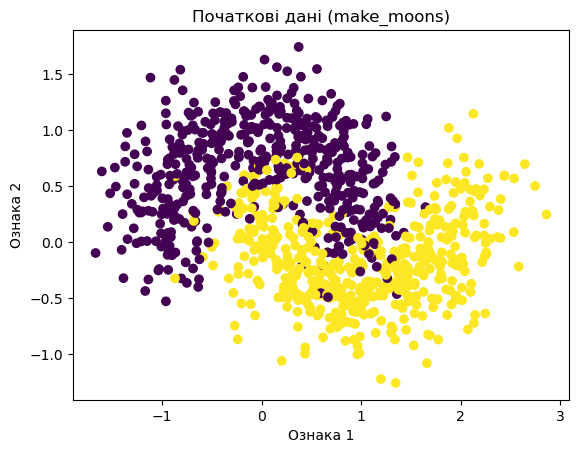

     Ознака 1  Ознака 2
0   -0.171863  0.596249
1    1.253283 -0.265414
2    0.723224  0.231943
3   -0.065198 -0.655194
4   -0.799493  0.552935
..        ...       ...
995  0.861014  0.343843
996 -0.229425  0.754849
997  1.770957 -0.509436
998 -1.061772  0.006786
999  0.761172  0.651960

[1000 rows x 2 columns]


In [59]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, auc, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.neural_network import MLPClassifier

# 1. Представлення початкових даних графічно
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Початкові дані (make_moons)')
plt.show()
df = pd.DataFrame(data=X, columns=['Ознака 1', 'Ознака 2'])
print(df)

### Розбиття даних на навчальний та валідаційний набори, побудова моделі класифікації, представлення моделі графічно

In [60]:
# 2. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 
best_accuracy = 0
best_num_neurons = 1

for num_neurons in range(1, 60, 5):
    model = MLPClassifier(hidden_layer_sizes=(num_neurons, ), solver='lbfgs', learning_rate_init=0.1, max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    y_pred_t = model.predict(X_train)
    accuracy_t = accuracy_score(y_train, y_pred_t)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_neurons = num_neurons


print(f'\nМодель з найкращою к-стю нейронів({best_num_neurons}):\n{report}\n\n')
print(f"Точність моделі на тренувальному наборі: {accuracy_t}")
print(f"Точність моделі на тестовому наборі: {accuracy}")




Модель з найкращою к-стю нейронів(41):
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       100
           1       0.95      0.92      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



Точність моделі на тренувальному наборі: 0.91875
Точність моделі на тестовому наборі: 0.935


### Виконання прогнозів та оцінка перенавчання

C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

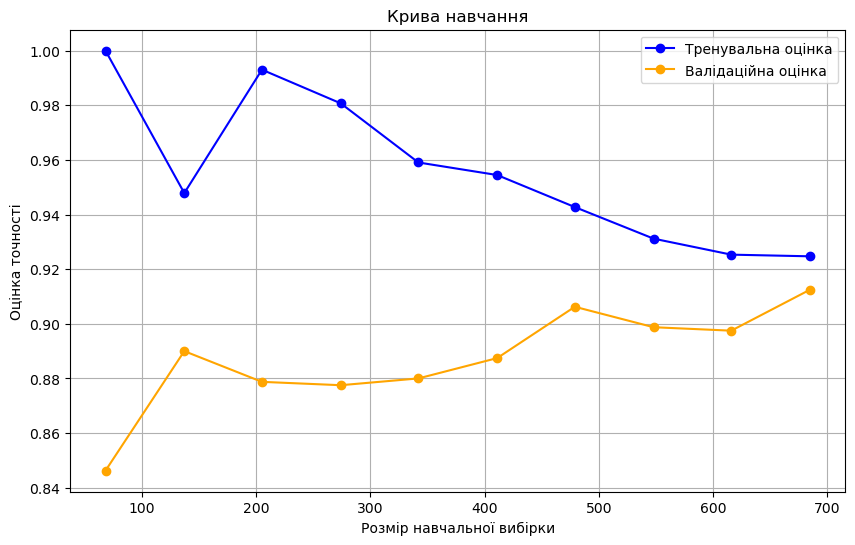

In [61]:

# 6.
# Можна провести аналіз перенавчання на основі кривої навчання

# Побудувати криву навчання
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=7)

# Визначити середні значення та стандартне відхилення для тренувального та тестового наборів
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Побудувати графік кривої навчання
plt.figure(figsize=(10, 6))
plt.title('Крива навчання')
plt.xlabel('Розмір навчальної вибірки')
plt.ylabel('Оцінка точності')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Тренувальна оцінка')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Валідаційна оцінка')
plt.legend(loc='best')
plt.grid()
plt.show()



### Розрахунок додаткових результатів

In [62]:
# 7.
y_prob = model.predict_proba(X_test)[:, 1]
y_prob_t = model.predict_proba(X_train)[:, 1]
print(y_prob)

[9.46906520e-01 2.97929628e-01 9.76275084e-01 6.42315615e-04
 9.98368489e-01 9.99981913e-01 3.63658908e-01 1.97368429e-01
 9.99904710e-01 1.58265057e-01 3.61597473e-02 9.90448501e-01
 2.07559137e-02 9.99739881e-01 6.00143806e-04 9.88941061e-01
 9.85050115e-01 7.93097911e-03 9.57722529e-01 6.26860036e-04
 2.13160695e-03 1.18697671e-01 9.63489283e-01 2.98446469e-04
 3.81674975e-01 4.46108329e-01 1.27905655e-01 4.39003283e-03
 1.04291045e-02 9.26042688e-01 9.51038313e-01 7.99892362e-02
 6.50978666e-01 9.99211526e-01 2.12209333e-03 9.85311164e-01
 5.00634971e-01 8.12508617e-01 9.99962794e-01 9.59025960e-01
 8.45547813e-01 9.84646292e-01 9.87232173e-01 1.01489896e-04
 2.40017508e-01 9.66735298e-01 1.46220843e-05 5.89290854e-04
 9.57793142e-01 9.99999893e-01 3.47824386e-01 1.03079028e-02
 9.64475558e-04 1.09006774e-03 5.84527488e-01 1.09868784e-02
 5.35769377e-01 8.67614755e-01 9.44649513e-01 1.77181663e-02
 9.90961173e-01 2.41145873e-01 6.91660535e-02 9.54376567e-01
 9.78398721e-01 9.791056

### Побудова границь рішень графічно

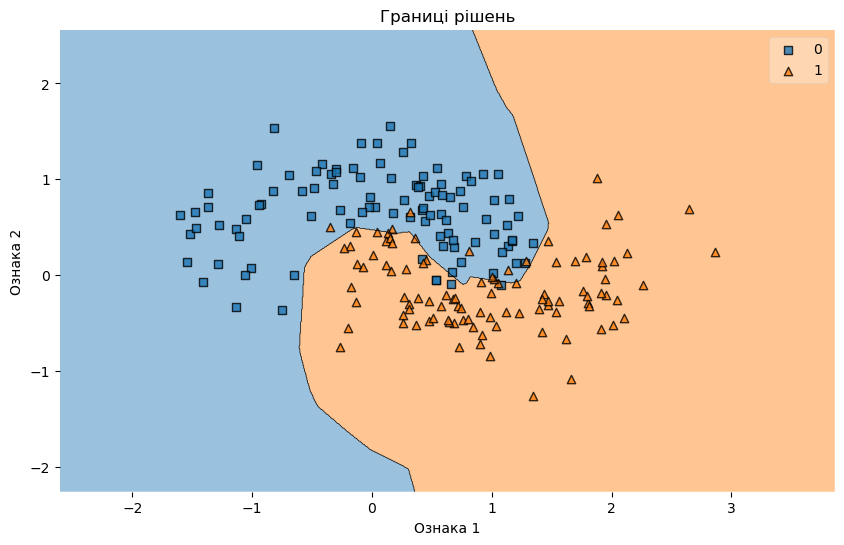

In [63]:
# 8.
# Для візуалізації границь рішень можна створити мішень контурних графіків
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test, y_test, clf=model)
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Границі рішень')
plt.show()


### Розрахунок критеріїв якості на тестовій множині

Accuracy: 0.935
Confusion matrix:
[[95  5]
 [ 8 92]]
F1: 0.9340101522842639
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       100
           1       0.95      0.92      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



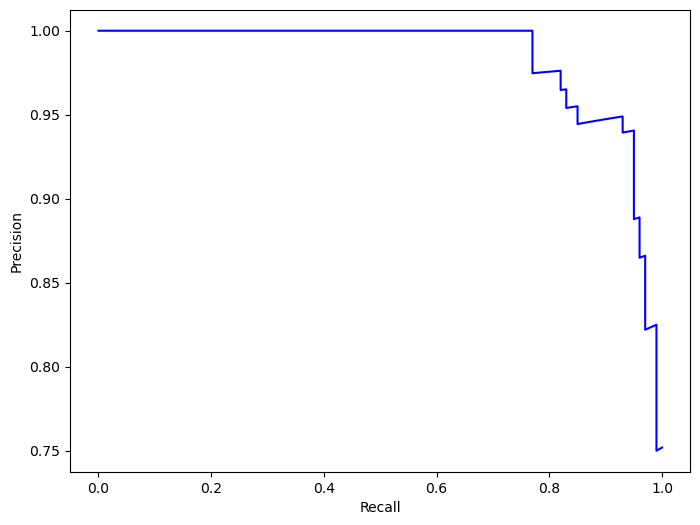

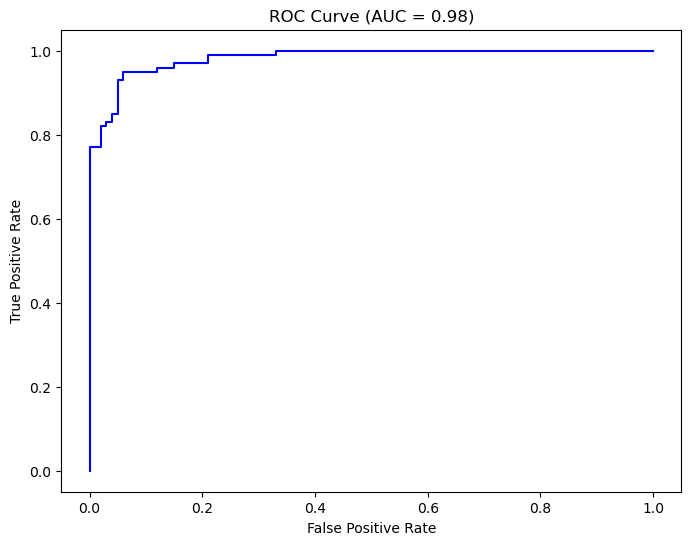

In [64]:
# 9.1
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion matrix:')
print(conf_matrix)
print(f'F1: {f1}')

report = classification_report(y_test, y_pred)
print(report)



precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')



fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

### Розрахунок критеріїв якості на навчальній множині

0.91875
[[372  28]
 [ 37 363]]
0.9178255372945638
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       400
           1       0.93      0.91      0.92       400

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



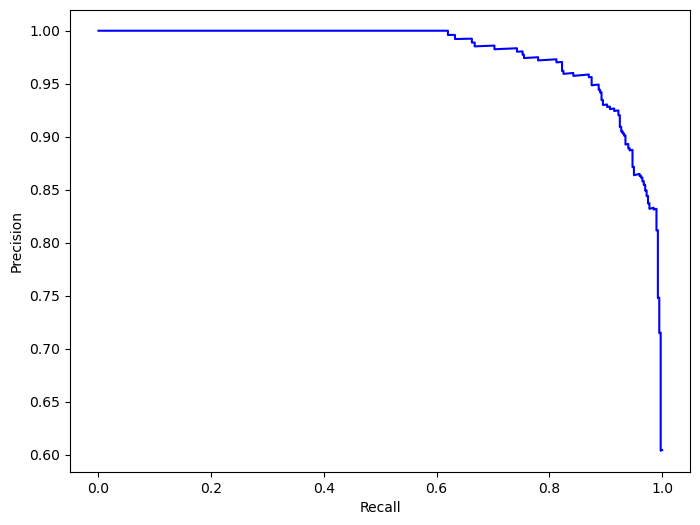

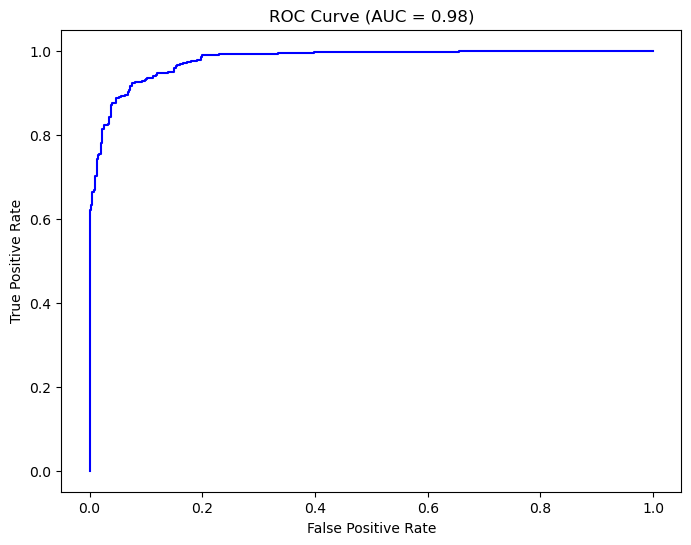

In [65]:
# 9.2
accuracy_t = accuracy_score(y_train, y_pred_t)
conf_matrix_t = confusion_matrix(y_train, y_pred_t)
f1_t = f1_score(y_train, y_pred_t)
print(accuracy_t)
print(conf_matrix_t)
print(f1_t)

report_t = classification_report(y_train, y_pred_t)
print(report_t)


precision_t, recall_t, _ = precision_recall_curve(y_train, y_prob_t)
plt.figure(figsize=(8, 6))
plt.plot(recall_t, precision_t, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


fpr_t, tpr_t, _ = roc_curve(y_train, y_prob_t)
roc_auc_t = roc_auc_score(y_train, y_prob_t)
plt.figure(figsize=(8, 6))
plt.plot(fpr_t, tpr_t, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc_t:.2f})')
plt.show()

## GridSearch

In [66]:
# 10.

param_grid = {
    'hidden_layer_sizes': np.arange(10, 80, 10),
    'max_iter': [2000], 
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['identity', 'logistic', 'tanh','relu'],
     'learning_rate_init':[0.1],
}

# Створили Grid Search об'єкт
grid_search = GridSearchCV(model, param_grid, cv=5, refit=True, scoring='accuracy')

# Запустили Grid Search на навчальних даних
grid_search.fit(X_train, y_train)
# Отримали найкращі гіперпараметри
print(grid_search.best_score_)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
print('Test accuracy: %.3f' % best_model.score(X_test, y_test))


C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

0.9125
{'activation': 'relu', 'hidden_layer_sizes': 30, 'learning_rate_init': 0.1, 'max_iter': 2000, 'solver': 'lbfgs'}
Test accuracy: 0.940


Отримуємо міру найкращої моделі та пергелядаємо її параметри.
Далі, ми використовуємо тестовий набір даних для оцінки ефективності обраної найкращої моделі за допомогою оцінщика.

### Оцінка якості моделі на основі метрик та графічних представлень

Бачимо, що дана модель добре працює і з одним шаром, при парамтерах вказаних після GridSearchCV, точність на тестовій множині 0.940, що дуже непогано. Можливо для того, щоб довести її до "ідеалу" треба спробувати два шари(наприклад 20 і 20). 


In [94]:
model = MLPClassifier(hidden_layer_sizes=(20, 20, ), solver='lbfgs', learning_rate_init=0.1, max_iter=2000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        30
           3       0.97      1.00      0.98        30
           4       0.98      1.00      0.99        41
           5       1.00      0.94      0.97        33
           8       0.95      1.00      0.98        42
           9       0.95      0.95      0.95        41

    accuracy                           0.97       217
   macro avg       0.97      0.97      0.97       217
weighted avg       0.97      0.97      0.97       217



Тут чітко бачимо майже ідеальні показники по всім оціночним праметрам, але без оверфіту. За всіма показниками робимо висновок, що не треба додавати ще шари, модель добре працює і на одному, але на двох близько до ідеальної.

### Вплив розміру навчальної множини


In [67]:
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(30, ), solver='lbfgs', learning_rate_init=0.1, max_iter=2000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.71      0.83      0.77         6

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



In [68]:
X, y = make_moons(n_samples=250, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(30, ), solver='lbfgs', learning_rate_init=0.1, max_iter=2000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.93      0.93      0.93        27

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [69]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(30, ), solver='lbfgs', learning_rate_init=0.1, max_iter=2000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        43
           1       0.98      0.81      0.88        57

    accuracy                           0.88       100
   macro avg       0.89      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100



#### Бачимо чітку закономірність покращення якості моделі із збільшенням об'єму вибірки

# load_digits

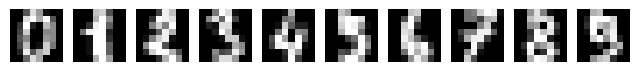

In [70]:
from sklearn.datasets import load_digits

# 1. Завантаження даних і їх візуалізація
digits = load_digits()
X = digits.data
y = digits.target

# Візуалізуємо декілька зразків зображень
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()


In [71]:
# 2. Розділіть дані на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_neurons = 64
model2 = MLPClassifier(hidden_layer_sizes=(num_neurons, ), solver='lbfgs', learning_rate_init=0.1, max_iter=1000, random_state=42)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
y_pred_t = model2.predict(X_train)

report = classification_report(y_test, y_pred)
print(f'\nМодель з найкращою к-стю нейронів({num_neurons}):\n{report}\n\n')



Модель з найкращою к-стю нейронів(64):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.94      0.95        47
           6       1.00      0.97      0.99        35
           7       1.00      0.94      0.97        34
           8       0.93      0.93      0.93        30
           9       0.93      0.97      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360





### Розрахунок критеріїв якості на тестовій множині

In [72]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [73]:
f1_score(y_test, y_pred, average = "micro")

0.9666666666666667

In [74]:
confusion_matrix(y_test, y_pred)

array([[32,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  2],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 39]], dtype=int64)

In [75]:
precision_score(y_test, y_pred, average=None)

array([0.96969697, 0.93333333, 0.94117647, 1.        , 1.        ,
       0.95652174, 1.        , 1.        , 0.93333333, 0.92857143])

In [76]:
recall_score(y_test, y_pred, average=None)

array([0.96969697, 1.        , 0.96969697, 0.97058824, 1.        ,
       0.93617021, 0.97142857, 0.94117647, 0.93333333, 0.975     ])

In [77]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.94      0.95        47
           6       1.00      0.97      0.99        35
           7       1.00      0.94      0.97        34
           8       0.93      0.93      0.93        30
           9       0.93      0.97      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Розрахунок критеріїв якості на навчальній множині

In [78]:
accuracy_score(y_train, y_pred_t)

1.0

In [79]:
f1_score(y_train, y_pred_t, average = "micro")

1.0

In [80]:
confusion_matrix(y_train, y_pred_t)

array([[145,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 154,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 144,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 149,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 135,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 135,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 146,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 145,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 144,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 140]], dtype=int64)

In [81]:
precision_score(y_train, y_pred_t, average=None)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
recall_score(y_train, y_pred_t, average=None)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Розрахунок критеріїв якості на тестовій множині(продовження)

In [83]:
def pr_curve(estimator, X, y):
    Y = label_binarize(y, classes = np.unique(y))
    n_classes = Y.shape[1]
    y_score = estimator.predict_proba(X)

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y[:, i], y_score[:, i])

    precision["micro"], recall["micro"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(Y, y_score, average="micro")

    color = cycle(["darkgreen", "darkorange", "cornflowerblue", "red"])

    _, ax = plt.subplots(figsize=(7, 8))

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color='deeppink', linestyle=':', lw = 4)

    for i, color in zip(range(n_classes), color):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i]
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i+1}", color=color)


    handles, labels = display.ax_.get_legend_handles_labels()

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Precision-Recall curve to multi-class")

    plt.show()

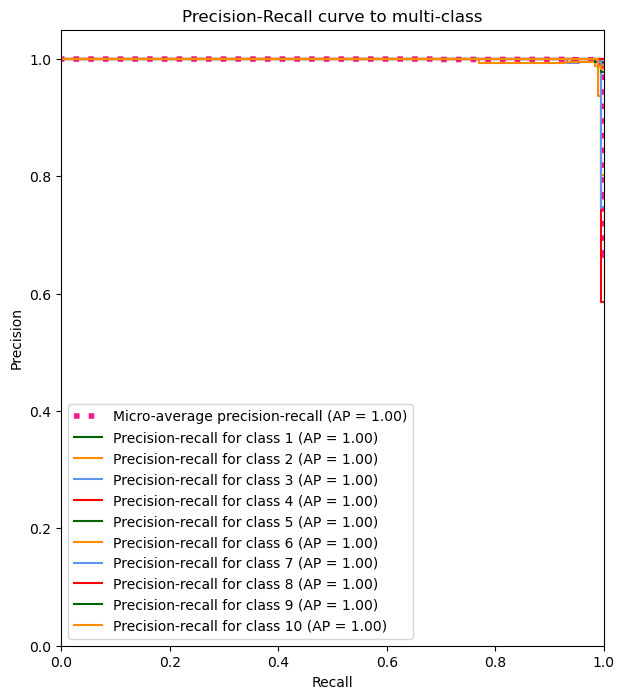

In [84]:
pr_curve(model2, X, y)

In [85]:
def rc_curve(model, X, y):    
    Y = label_binarize(y, classes = np.unique(y)) 
    n_classes = Y.shape[1] 
    y_score = model.predict_proba(X) 
    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])



    _, ax = plt.subplots(figsize=(7, 8))
    
    color = cycle(["navy", "green", "darkorange", "cornflowerblue", "red"])
        
    fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), y_score.ravel()) 
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    RocCurveDisplay(
            fpr=fpr["micro"],
            tpr=tpr["micro"],
            roc_auc=roc_auc["micro"]
        ).plot(ax=ax, name=f"micro average ROC-CURVE", color='deeppink', linestyle=':', linewidth=4) 
    
    
    for i, color in zip(range(n_classes), color):
        display = RocCurveDisplay(
            fpr=fpr[i],
            tpr=tpr[i],
            roc_auc=roc_auc[i]
        )
        display.plot(ax=ax, name=f"ROC-CURVE for class {i+1}", color=color)        
        
        

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

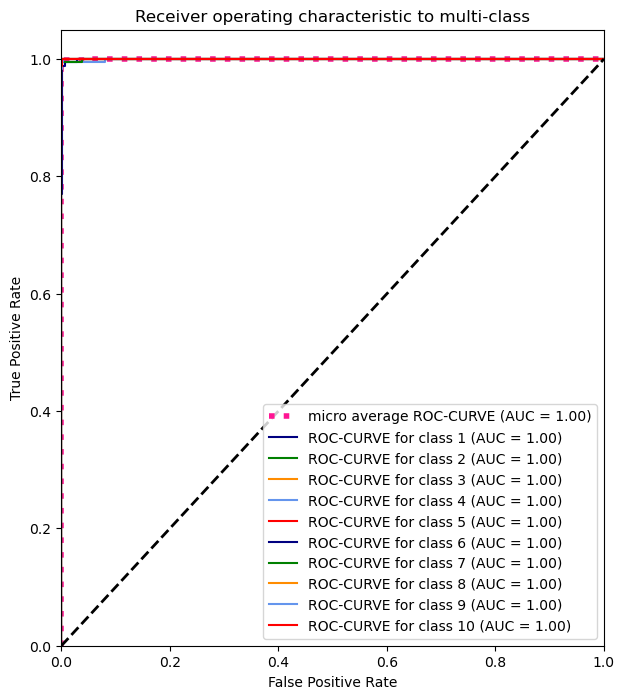

In [86]:
rc_curve(model2, X, y)

## GridSearch

In [87]:
param_grid = {
    'hidden_layer_sizes': np.arange(10, 80, 10),
    'max_iter': [1000], 
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['identity', 'logistic', 'tanh','relu'],
     'learning_rate_init':[0.1],
}

# Створили Grid Search об'єкт
grid_search = GridSearchCV(model2, param_grid, cv=10, refit=True, scoring='accuracy')

# Запустили Grid Search на навчальних даних
grid_search.fit(X_train, y_train)
# Отримали найкращі гіперпараметри
print(grid_search.best_score_)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
print('Test accuracy: %.3f' % best_model.score(X_test, y_test))


C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Funt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

0.9770299145299146
{'activation': 'logistic', 'hidden_layer_sizes': 70, 'learning_rate_init': 0.1, 'max_iter': 1000, 'solver': 'sgd'}
Test accuracy: 0.975


## Висновки

Тут чітко бачимо майже ідеальні показники по всім оціночним праметрам, що каже про наявність оверфіту, але водночас, грід сьорч показав, що краще мати 70 нейронів у першому скритому шарі, налаштувати також інші параметри, і точність не буде сильно відрізнятись, хіба що прибрано оверфіт невеликий. За всіма показниками робимо висновок, що не треба додавати ще шари, модель добре працює і на одному.

In [88]:

selected_digits = [1, 7, 3]

# Вибираємо індекси зразків, які відповідають цим цифрам
selected_indices = [i for i in range(len(y)) if y[i] in selected_digits]

# Створення окремих датасетів
X_selected = X[selected_indices]
y_selected = y[selected_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)
model2 = MLPClassifier(hidden_layer_sizes=(75, ), solver='lbfgs', learning_rate_init=0.1, max_iter=1000, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           3       0.97      0.97      0.97        36
           7       0.98      0.98      0.98        41

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109



In [89]:

selected_digits = [1, 8, 3, 4, 5, 9]

# Вибираємо індекси зразків, які відповідають цим цифрам
selected_indices = [i for i in range(len(y)) if y[i] in selected_digits]

# Створення окремих датасетів
X_selected = X[selected_indices]
y_selected = y[selected_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)
model2 = MLPClassifier(hidden_layer_sizes=(75, ), solver='lbfgs', learning_rate_init=0.1, max_iter=1000, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        41
           5       1.00      0.97      0.98        33
           8       0.95      0.95      0.95        42
           9       0.95      0.98      0.96        41

    accuracy                           0.98       217
   macro avg       0.98      0.98      0.98       217
weighted avg       0.98      0.98      0.98       217



Бачимо чітку закономірність покращення якості моделі із збільшенням об'єму вибірки